In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
class correlation_matrix:
  def __init__(self, df):
    self.df = np.array(df)
    self.cols = list(df.columns)
    self.samples, self.features = df.shape
    self.mean = self.df.mean(axis=0)
    self.co_var_matrix = None

    self._normlaize()
    self.df = self.df - self.df.mean(axis=0)
    self.co_var_matrix = np.dot(self.df.T, self.df) / (self.samples)


  def show_correlation_matrix_plot(self):
    fig, ax = plt.subplots()
    im = ax.imshow(self.co_var_matrix, cmap='coolwarm', interpolation='nearest')
    ax.set_xticks(np.arange(len(self.co_var_matrix)))
    ax.set_yticks(np.arange(len(self.co_var_matrix)))
    ax.set_xticklabels([col for col in self.cols])
    ax.set_yticklabels([col for col in self.cols])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
		         rotation_mode="anchor")

    for i in range(len(self.co_var_matrix)):
      for j in range(len(self.co_var_matrix)):
		      ax.text(j, i, '{:.2f}'.format(self.co_var_matrix[i, j]),
		                ha="center", va="center", color="w")

    plt.colorbar(im)
    plt.show()
  
  def return_matrix(self):
    return self.co_var_matrix

  def _normlaize(self):
    self.df  = (self.df - self.mean) / self.df.std(axis=0)

In [21]:
df = pd.read_csv("/content/iris.csv")
df = df.drop(columns="variety")
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
cm = correlation_matrix(df)

In [24]:
cm.return_matrix()

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

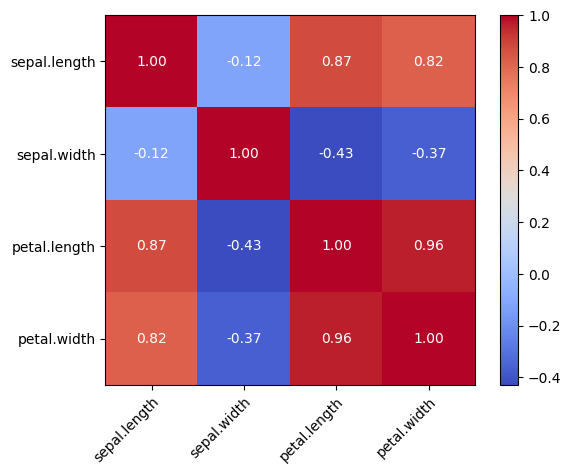

In [25]:
cm.show_correlation_matrix_plot()